In [20]:
!pip install -q kaggle

In [21]:
pwd

'/content'

In [22]:
ls

c102db7634d8.png  sample_data/


In [26]:
!chmod 600 ~/.kaggle/kaggle.json  # changing the permissions to json

In [27]:
!kaggle datasets download -d arbethi/diabetic-retinopathy-level-detection

100% 9.64G/9.66G [01:37<00:00, 98.0MB/s]
100% 9.66G/9.66G [01:37<00:00, 107MB/s] 


In [28]:
!unzip diabetic-retinopathy-level-detection.zip

Archive:  diabetic-retinopathy-level-detection.zip
  inflating: inception-diabetic.h5   
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cfb17a7cc8d4.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cfdbaef73a8b.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cfed7c1172ec.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cff262ed8f4c.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/cffc50047828.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d02b79fc3200.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d0926ed2c8e5.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d160ebef4117.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d16e39b9d6f0.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d16e59a2b33a.png  
  inflating: preprocessed dataset/preprocessed dataset/testing/0/d18f64

In [8]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.xception import Xception, preprocess_input
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [29]:
pwd

'/content'

In [30]:
ls

 c102db7634d8.png                           inception-diabetic.h5    sample_data/
 diabetic-retinopathy-level-detection.zip  'preprocessed dataset'/


In [31]:
imageSize = [299, 299]

trainPath = r"/content/preprocessed dataset/preprocessed dataset/training"

testPath = r"/content/preprocessed dataset/preprocessed dataset/testing"

In [32]:
xception = Xception(input_shape=imageSize + [3], weights='imagenet',include_top=False)

83683744/83683744 [==============================] - 0s 0us/step


In [33]:
# don't train existing weights
for layer in xception.layers:
    layer.trainable = False

In [34]:
# our layers - you can add more if you want
x = Flatten()(xception.output)

In [35]:
prediction = Dense(5, activation='softmax')(x)

In [36]:
# create a model object
model = Model(inputs=xception.input, outputs=prediction)

In [37]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [38]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [39]:
training_set = train_datagen.flow_from_directory(r'/content/preprocessed dataset/preprocessed dataset/training',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3662 images belonging to 5 classes.


In [40]:
test_set = test_datagen.flow_from_directory(r'/content/preprocessed dataset/preprocessed dataset/testing',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 734 images belonging to 5 classes.


In [41]:
training_set.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}

In [ ]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=22
)

Epoch 1/5
115/115 [==============================] - 596s 5s/step - loss: 4.0907 - accuracy: 0.6644 - val_loss: 2.6746 - val_accuracy: 0.7528
Epoch 2/5
115/115 [==============================] - 574s 5s/step - loss: 3.7288 - accuracy: 0.7157 - val_loss: 2.5434 - val_accuracy: 0.7585
Epoch 3/5
115/115 [==============================] - 562s 5s/step - loss: 3.3078 - accuracy: 0.7365 - val_loss: 2.8310 - val_accuracy: 0.7798
Epoch 4/5
115/115 [==============================] - 562s 5s/step - loss: 3.2878 - accuracy: 0.7537 - val_loss: 2.3696 - val_accuracy: 0.7713
Epoch 5/5
115/115 [==============================] - 562s 5s/step - loss: 3.7618 - accuracy: 0.7540 - val_loss: 2.2963 - val_accuracy: 0.7926


In [ ]:
model.save('retinomodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [13]:
img = image.load_img('/content/c102db7634d8.png',target_size=(299,299))

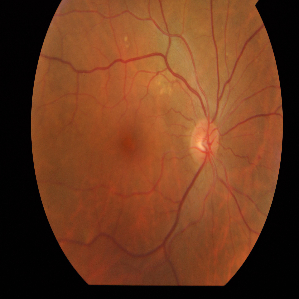

In [14]:

img

In [17]:
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)

In [18]:
from tensorflow.keras.models import load_model
model=load_model("/retinomodel.h5")
prediction=model.predict(img)
best_pred=np.argmax(prediction)

1/1 [==============================] - 2s 2s/step
